# Problem Statement :-

Dataset contain (42000, 785) values where 784 different pixel values and One label columuns which tells about what digit it is (between 0-9)

Our Aim is to find How Dimensionality reducton techniques help

#### We will try to find out what was accuracy before dimensionlity reduction technique applied and after applying.
#### Time taken in model learning before and after

In [1]:
# importing various package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.decomposition import IncrementalPCA
sns.set()

**Steps Followed :-** <br>

>Importing required libraries <br>
Reading and understanding the data <br>
Building Logistic regression model before PCA  <br>
Time Taken and Model Evaluation<br>
PCA <br>
Building logistic regression model afteer PCa<br>
Time Taken and Model Evaluation <br>
Comparing model beofore pca and after pca





In [2]:
df = pd.read_csv('digit_recognizer.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


If We see columns contain 0 and 1 values and datatype of columns is int64 which will take more memory, we can convert to uint8 uint can take values between 0 to 255
it will help in saving some memory

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
df=df.astype("uint8")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: uint8(785)
memory usage: 31.4 MB


We can see before changing datatype  memory usage was 251.5 MB but after changing data type it reduced to 31.4 mb

E:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

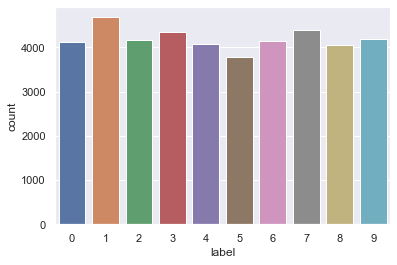

In [10]:
# checking count of different digit present  label columns 
sns.countplot("label",data=df)

We have label between 0 and 9, all are almost equal distributed <br>
We can say we don't have data imbalance problem

In [11]:
# creaating X (predictor) and y (dependent) 
X=df.drop("label",1)
y=df["label"]

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29399, 784)
(29399,)
(12601, 784)
(12601,)


### Creating first model without using any Dimensionality reduction technique
We will used 10 cross fold here and accuracy as evaluation matrix 

In [13]:

%%time
log_reg= LogisticRegression(multi_class='multinomial', solver='saga')
scores = cross_val_score(log_reg, X_train,y_train, cv=10,scoring='accuracy')


E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\

Wall time: 33min 41s


E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
print('Accuracy for Logistic Regression: ', scores.mean())
print('Accuracy for Logistic Regression: ', scores.min())
print('Accuracy for Logistic Regression: ', scores.max())

Accuracy for Logistic Regression:  0.913058122874873
Accuracy for Logistic Regression:  0.9040816326530612
Accuracy for Logistic Regression:  0.9224489795918367


### we got avg accuracy of .91 in logistic regression

In [15]:
# Making final model for checking on hold out test
lr1=LogisticRegression(multi_class='multinomial', solver='saga')
lr1.fit(X_train,y_train)

E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', solver='saga')

In [16]:
y_test_predict=lr1.predict(X_test)


In [17]:

print(accuracy_score(y_test,y_test_predict))

0.9108800888818348


### we got .91 accuracy IN test set

# Applying Dimensionality reduction technique

#### PCA 

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(random_state=100)
pca.fit_transform(X=X_train)

array([[-8.45868908e+02, -2.76345132e+02, -2.43711910e+01, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-8.44655572e+02, -2.23173556e+02, -3.81298561e+01, ...,
        -6.77664675e-13, -9.71354322e-14,  1.62376241e-13],
       [-9.99009707e+01, -2.32923213e+02,  1.01025526e+03, ...,
        -4.46779222e-14,  2.11409173e-15,  9.59542107e-14],
       ...,
       [ 2.34077713e+02, -2.81589092e+02,  6.37405780e+02, ...,
         6.29684766e-16,  3.29489307e-17, -7.26922009e-16],
       [ 2.81549248e+01,  1.02253652e+03, -2.25432595e+02, ...,
        -4.04737247e-15,  3.91606420e-15, -2.60822131e-15],
       [ 1.49918999e+03,  1.77256333e+01,  4.11092946e+02, ...,
        -2.13207874e-16,  1.85828500e-15, -4.77466139e-17]])

In [20]:
pca.explained_variance_ratio_

array([9.71883383e-02, 7.18973682e-02, 6.16165348e-02, 5.37284385e-02,
       4.91222560e-02, 4.29259595e-02, 3.26501896e-02, 2.89060943e-02,
       2.76652803e-02, 2.35431658e-02, 2.10491264e-02, 2.04868296e-02,
       1.70837952e-02, 1.70139662e-02, 1.57547638e-02, 1.48585618e-02,
       1.32988722e-02, 1.28558968e-02, 1.19287936e-02, 1.15017237e-02,
       1.06957882e-02, 1.01754332e-02, 9.59858906e-03, 9.07347862e-03,
       8.84155206e-03, 8.40984109e-03, 8.20217545e-03, 7.66020276e-03,
       7.37783026e-03, 6.89187557e-03, 6.58323950e-03, 6.38071542e-03,
       6.02575296e-03, 5.85781361e-03, 5.60116783e-03, 5.39858402e-03,
       5.10113326e-03, 4.88414865e-03, 4.79022451e-03, 4.71384231e-03,
       4.52514294e-03, 4.44430276e-03, 4.18339130e-03, 3.98454543e-03,
       3.86777584e-03, 3.72584439e-03, 3.62133515e-03, 3.48223912e-03,
       3.35241937e-03, 3.20407997e-03, 3.15778900e-03, 3.09452340e-03,
       2.94101256e-03, 2.86420422e-03, 2.83146607e-03, 2.72606526e-03,
      

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

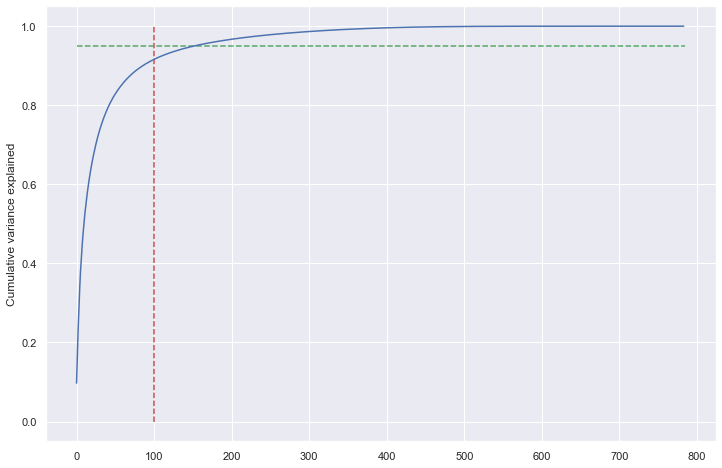

In [22]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=100, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=785, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**We can achieve 90+ variance with only about 120 columns**

In [23]:
pca=PCA(n_components=120,random_state=100)
pca.fit_transform(X=X_train)

array([[-845.86890836, -276.34513212,  -24.37119061, ...,  -90.4896623 ,
          -7.63236036,   56.15194147],
       [-844.65557238, -223.17355584,  -38.12985612, ...,   27.06869542,
          61.15238641,   -3.73550699],
       [ -99.90097073, -232.92321383, 1010.25525564, ...,   16.84329907,
         -29.67562869,   11.56637762],
       ...,
       [ 234.077713  , -281.58909174,  637.40577898, ...,    5.14962214,
         -71.04480442,  -21.55758248],
       [  28.15492481, 1022.53651936, -225.43259513, ...,   58.55514271,
         -16.54584668,  -10.48296737],
       [1499.18998869,   17.72563326,  411.09294504, ...,   34.71762817,
          32.74969326,  -22.30938335]])

In [24]:


pca_final = IncrementalPCA(n_components=120)

df_train_pca = pca_final.fit_transform(X_train)

df_train_pca.shape

(29399, 120)

In [25]:
df_test_pca=pca_final.transform(X_test)

In [26]:
df_test_pca.shape

(12601, 120)

In [27]:
%%time 

# model build with 120 columns

log_reg_pca= LogisticRegression(multi_class='multinomial', solver='saga')
scores = cross_val_score(log_reg_pca, df_train_pca,y_train, cv=10,scoring='accuracy')

E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\python\

Wall time: 6min 26s


E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [28]:
print('Accuracy for Logistic Regression: ', scores.mean())
print('Accuracy for Logistic Regression: ', scores.min())
print('Accuracy for Logistic Regression: ', scores.max())

Accuracy for Logistic Regression:  0.9126837880439689
Accuracy for Logistic Regression:  0.9023809523809524
Accuracy for Logistic Regression:  0.926530612244898


In [29]:
lr_2_pca=LogisticRegression(multi_class='multinomial', solver='saga')
lr_2_pca.fit(df_train_pca,y_train)

E:\python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', solver='saga')

In [30]:
y_test_pred_pca=lr_2_pca.predict(df_test_pca)


In [31]:
accuracy_score(y_test,y_test_pred_pca)

0.9105626537576382

## Conclusion:-


We can see that before applying PCA Our model took **33** min to train with **91 %** accuracy in test dataset <br>
While after applying PCA We came to know that 90 % variance  can be achieved by only 120 features. <br>
and after building logisitic regression multiclass model we can still acheive **91 %** accuracy and model took only **6 min** to train.
<br>


So in short we can say that we reduce **84.7%** features without loosing much accuracy in logisitic regression <br>
and also time taken to train model  decrease to **82.4%** which is Quite good <br>

**Improves the performance of the algorithms <br>
Training time reduces. <br>
Reduces overfitting of the model. <br>